# *Определение более выгодного тарифа*

# Описание проекта
«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

Тариф «Смарт»

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

# Цель работы:

Определить какой тариф более выгоден для компании

# Задачи работы:

1. Ознакомиться с данными
2. Изменить типы столбцов на более подходящие, если есть необходимость
3. Объединить разрозненные таблицы в одну
4. Заполнить пропуски
5. Добавить в таблицу: количество звонков в месяц, длительность звонков в месяц, количество сообщений, отправленных по месяцам, объём трафик, истраченный по месяцам, помесячную выручку с каждого пользователя
6. Провести исследовательский анализ
7. Провести статистический анализ. Проверить следующие гипотезы:
        А. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
        Б. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

# Описание данных
Таблица users (информация о пользователях):
1. user_id — уникальный идентификатор пользователя
2. first_name — имя пользователя
3. last_name — фамилия пользователя
4. age — возраст пользователя (годы)
5. reg_date — дата подключения тарифа (день, месяц, год)
6. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
7. city — город проживания пользователя
8. tariff — название тарифного плана

Таблица calls (информация о звонках):
 
1. id — уникальный номер звонка
2. call_date — дата звонка
3. duration — длительность звонка в минутах
4. user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

1. id — уникальный номер сообщения
2. message_date — дата сообщения
3. user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

1. id — уникальный номер сессии
2. mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
3. session_date — дата интернет-сессии
4. user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

1. tariff_name — название тарифа
2. rub_monthly_fee — ежемесячная абонентская плата в рублях
3. minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
4. messages_included — количество сообщений в месяц, включённых в абонентскую плату
5. mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
6. rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
7. rub_per_message — стоимость отправки сообщения сверх тарифного пакета
8. rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Шаг 1. Ознакомление с данными и их подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
internet = pd.read_csv('/datasets/internet.csv')

In [3]:
users.info()
display(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


В 'churn_date' - пропуски сигрнализируют о том, что пользователь всё ещё пользуется тарифом. Не заполняем.

In [4]:
# Изменим тип данных в столбце 'reg_date' на datetime.
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [5]:
# Посмотрим на возможные дубликаты
users.duplicated().sum()

0

In [6]:
calls.info()
display(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [7]:
# call_date  преобразовываем в тип datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])
# duration под типом float, - значит в таблице есть значения не равные целым значениям. Так как время разговора
# округляется до минуты, округлим все значения, не равные нулю вверх и затем поменяем тип данных в столбце int
calls['duration'] = np.ceil((calls['duration'])).astype('int')
# длительность звонков, равная 0, - пропущенные звонки. Пока оставим. Но в дальнейшем можем проверить, как анализ изменится в
# зависимости от присутствия или отсутствия этих значений
#Проверим таблицу на дубликаты
calls.duplicated().sum()

0

In [8]:
messages.info()
display(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [9]:
# Изменим тип данных в message_date на datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])
# Проверим таблицу на дубликаты
calls.duplicated().sum()

0

In [10]:
tariffs.info()
display(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
# переименуем колонку tariff_name на tariff, чтобы в дальнейшем можно было объединить таблицы
tariffs = tariffs.rename(columns = {'tariff_name' : 'tariff'})

In [12]:
internet.info()
display(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Столбец 'unnamed: 0' соответствует индексам таблицы. Видимо, при переносе информации столбец индексов был скопирован. 
Поэтому можем спокойно его удалить

In [13]:
# 'session_date' меняем на тип datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])
# Проверим на дубликаты
internet.duplicated().sum()
# mb_used округлим вверх до целого значения, так как мегалайн округляет трафик за сессию дол целого значения вверх
# и изменим тип этого столбца на int
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

# 2. Объединение таблиц и добавление новых столбцов 

In [14]:
# Добавим в таблицы в calls, messages, internet столбец 'month'
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
calls['month'] = calls['call_date'].dt.month

In [15]:
# Теперь вычислим суммарное количество звонков, сообщений и интернет трафика в разных таблицах
user_calls = calls.groupby(['user_id', 'month'])\
                        .agg({'duration':'sum', 'id':'count'})\
                        .reset_index()\
                        .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [16]:
user_messages.info()
user_calls.info()
user_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id               2717 non-null int64
month                 2717 non-null int64
sms_total_in_month    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id                 3174 non-null int64
month                   3174 non-null int64
month_calls_duration    3174 non-null int64
calls_total_in_month    3174 non-null int64
dtypes: int64(4)
memory usage: 99.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id              3203 non-null int64
month                3203 non-null int64
mb_total_in_month    3203 non-null int64
dtypes: int64(3)
memory usage: 75.2 KB


In [17]:
# Теперь объединим все таблицы в одну
df = (user_calls.merge(user_messages, on = ['user_id', 'month'], how='outer')
        .merge(user_internet, on = ['user_id', 'month'], how='outer')
        .merge(users, on='user_id', how='left')
        .merge(tariffs, on='tariff', how='left'))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
month_calls_duration     3174 non-null float64
calls_total_in_month     3174 non-null float64
sms_total_in_month       2717 non-null float64
mb_total_in_month        3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute   

In [19]:
# В sms_total_in_month, mb_total_in_month  и calls_total_in_month есть пропуски. Можем преположить, что эти строки сообщают
# о неиспользовании какой-то услуги. Заменим значения в соотвествующих строках нулями.
df[['month_calls_duration', 'calls_total_in_month', 'sms_total_in_month', 'mb_total_in_month']] = df[['month_calls_duration',
                                                'calls_total_in_month', 'sms_total_in_month', 'mb_total_in_month']].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
month_calls_duration     3214 non-null float64
calls_total_in_month     3214 non-null float64
sms_total_in_month       3214 non-null float64
mb_total_in_month        3214 non-null float64
age                      3214 non-null int64
churn_date               187 non-null object
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute   

In [20]:
df

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17232.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,10,0.0,0.0,21.0,19588.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,11,0.0,0.0,20.0,17516.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,12,0.0,0.0,35.0,17341.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [21]:
# Посчитаем, какое количество минут разговора, мегабайтов и смс пользователи использовали сверх лимита по тарифу.
def mb_over_limit(data):
    significant_number = data['mb_total_in_month'] - data['mb_per_month_included'] 
    if significant_number <= 0:
        return 0
    else:
        return significant_number
def sms_over_limit(data):
    significant_number = data['sms_total_in_month'] - data['messages_included'] 
    if significant_number <= 0:
        return 0
    else:
        return significant_number
def calls_over_limit(data):
    significant_number = data['month_calls_duration'] - data['minutes_included'] 
    if significant_number <= 0:
        return 0
    else:
        return significant_number
    
df['mb_over_limit'] = df.apply(mb_over_limit, axis=1)
df['sms_over_limit'] = df.apply(sms_over_limit, axis=1)
df['calls_over_limit'] = df.apply(calls_over_limit, axis=1)

In [22]:
# Создадим столбцы с переплатами по смс, звонкам и мегабайтам
df['mb_over_fee'] = df['mb_over_limit'] * (df['rub_per_gb'] / 1024)
df['sms_over_fee'] = df['sms_over_limit'] * df['rub_per_message']
df['calls_over_fee'] = df['calls_over_limit'] * df['rub_per_minute']

In [23]:
# Рассчитаем общую выручку по каждому пользователю
df['total_revenue'] = df['mb_over_fee'] + df['sms_over_fee'] + df['calls_over_fee'] + df['rub_monthly_fee']

In [24]:
# Изменим тип данных на int 
df[['total_revenue', 'mb_over_fee', 'sms_over_fee', 'calls_over_fee']] = df[['total_revenue',
                                        'mb_over_fee', 'sms_over_fee', 'calls_over_fee']].astype('int')

In [25]:
df.describe()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,messages_included,mb_per_month_included,minutes_included,...,rub_per_gb,rub_per_message,rub_per_minute,mb_over_limit,sms_over_limit,calls_over_limit,mb_over_fee,sms_over_fee,calls_over_fee,total_revenue
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,...,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,451.244866,63.038892,38.281269,17227.585252,46.641568,341.148102,20067.405103,1266.179216,...,184.676416,2.387057,2.387057,2152.738021,4.022402,28.854698,408.942439,12.067206,86.564095,1486.634101
std,144.659172,2.905413,241.909978,33.236368,36.148326,7578.261501,16.586109,438.044726,7082.491569,1152.749279,...,23.054986,0.922199,0.922199,3418.309013,11.508916,73.077172,649.418103,34.526748,219.231515,783.896681
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,...,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,6.000000,282.000000,40.000000,9.000000,12505.250000,32.000000,50.000000,15360.000000,500.000000,...,150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,694.000000
50%,1253.000000,9.000000,443.000000,62.000000,30.000000,16966.500000,46.000000,50.000000,15360.000000,500.000000,...,200.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1562.500000
75%,1378.750000,11.000000,589.000000,82.000000,57.000000,21450.000000,62.000000,1000.000000,30720.000000,3000.000000,...,200.000000,3.000000,3.000000,3575.000000,0.000000,0.000000,683.750000,0.000000,0.000000,1950.000000
max,1499.000000,12.000000,1673.000000,244.000000,224.000000,49789.000000,75.000000,1000.000000,30720.000000,3000.000000,...,200.000000,3.000000,3.000000,23250.000000,93.000000,935.000000,4541.000000,279.000000,2805.000000,6711.000000


# 3. Проанализировать данные

In [26]:
# Разделим таблицу на две подтаблицы с разными тарифами, чтобы было проще анализировать
smart_df = df[df['tariff']=='smart']
ultra_df = df[df['tariff']=='ultra']
smart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 8 to 3212
Data columns (total 27 columns):
user_id                  2229 non-null int64
month                    2229 non-null int64
month_calls_duration     2229 non-null float64
calls_total_in_month     2229 non-null float64
sms_total_in_month       2229 non-null float64
mb_total_in_month        2229 non-null float64
age                      2229 non-null int64
churn_date               111 non-null object
city                     2229 non-null object
first_name               2229 non-null object
last_name                2229 non-null object
reg_date                 2229 non-null datetime64[ns]
tariff                   2229 non-null object
messages_included        2229 non-null int64
mb_per_month_included    2229 non-null int64
minutes_included         2229 non-null int64
rub_monthly_fee          2229 non-null int64
rub_per_gb               2229 non-null int64
rub_per_message          2229 non-null int64
rub_per_minute   

In [27]:
smart_df.describe()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,messages_included,mb_per_month_included,minutes_included,...,rub_per_gb,rub_per_message,rub_per_minute,mb_over_limit,sms_over_limit,calls_over_limit,mb_over_fee,sms_over_fee,calls_over_fee,total_revenue
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,...,2229.0,2229.0,2229.0,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,58.463437,33.384029,16229.188425,46.556303,50.0,15360.0,500.0,...,200.0,3.0,3.0,2770.599821,5.799910,41.605653,540.841184,17.399731,124.816958,1233.057873
std,146.119496,2.920316,190.313730,25.939858,28.227876,5877.576978,16.353371,0.0,0.0,0.0,...,0.0,0.0,0.0,3604.372271,13.442456,84.678573,703.827485,40.327368,254.035718,787.544032
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.0,15360.0,500.0,...,200.0,3.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,40.000000,10.000000,12658.000000,32.000000,50.0,15360.0,500.0,...,200.0,3.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
50%,1239.000000,9.000000,422.000000,60.000000,28.000000,16531.000000,47.000000,50.0,15360.0,500.0,...,200.0,3.0,3.0,1171.000000,0.000000,0.000000,228.000000,0.000000,0.000000,959.000000
75%,1376.000000,11.000000,545.000000,76.000000,51.000000,20068.000000,62.000000,50.0,15360.0,500.0,...,200.0,3.0,3.0,4708.000000,1.000000,45.000000,919.000000,3.000000,135.000000,1668.000000
max,1499.000000,12.000000,1435.000000,198.000000,143.000000,38610.000000,75.000000,50.0,15360.0,500.0,...,200.0,3.0,3.0,23250.000000,93.000000,935.000000,4541.000000,279.000000,2805.000000,6711.000000


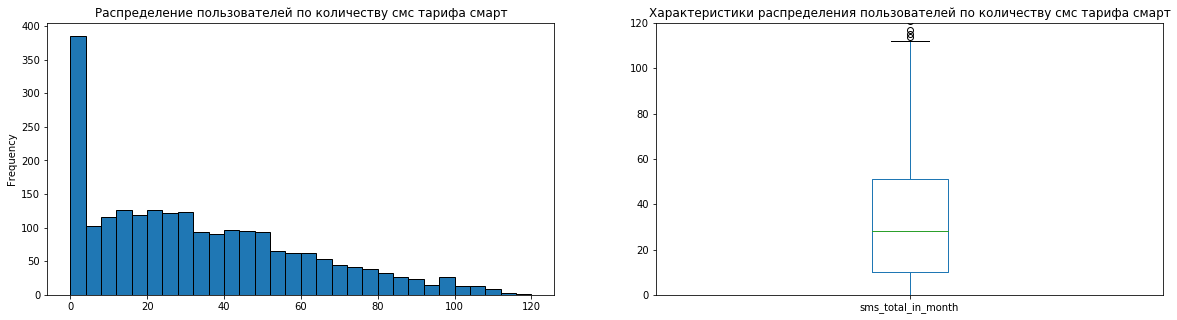

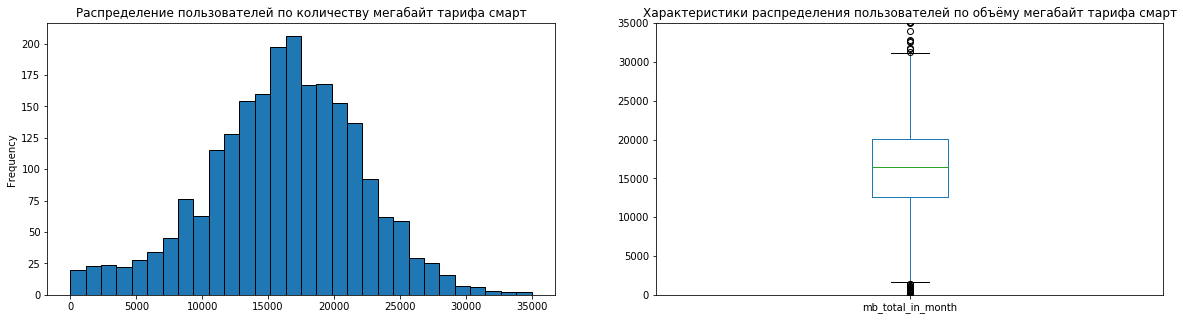

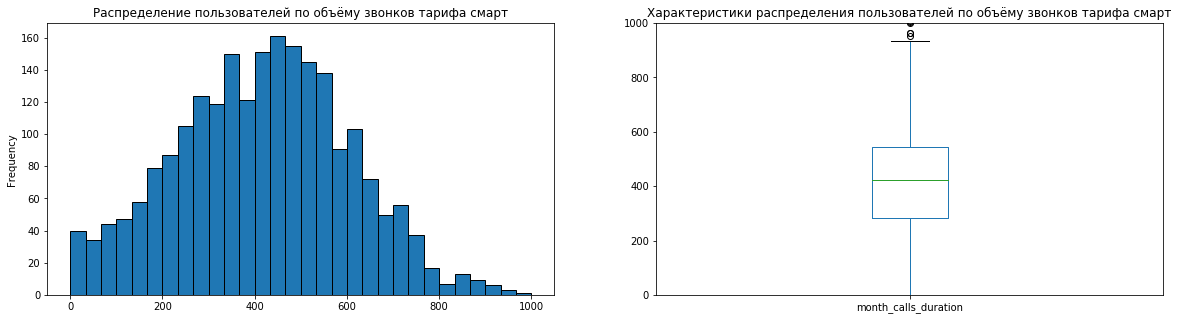

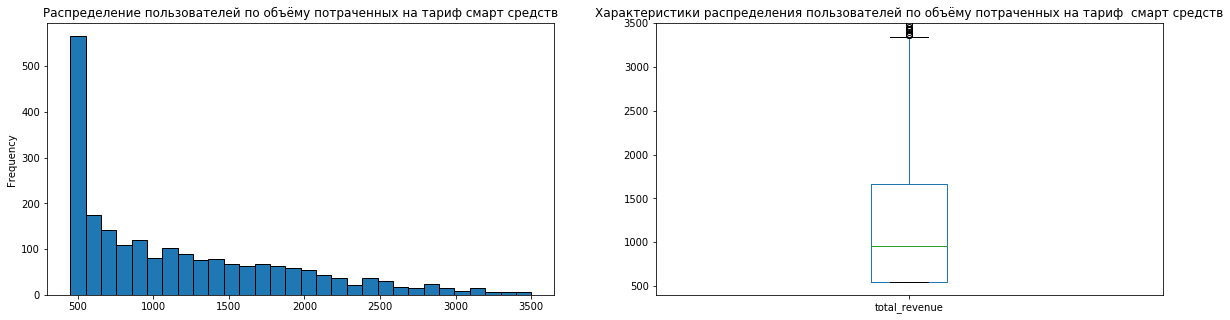

In [28]:
smart_dict = [ 
                {'bins' : 30 , 'column': 'sms_total_in_month', 'title_hist': 'Распределение пользователей по количеству смс тарифа смарт',
                'title_boxplot': 'Характеристики распределения пользователей по количеству смс тарифа смарт', 'range': 120, 'range_min' : 0,
                'box_lim' : 120, 'box_min' : 0},
 
                {'bins' : 30 , 'column': 'mb_total_in_month', 'title_hist': 'Распределение пользователей по количеству мегабайт тарифа смарт',
                'title_boxplot': 'Характеристики распределения пользователей по объёму мегабайт тарифа смарт', 'range': 35000, 'range_min'  : 0,
                 'box_lim' : 35000, 'box_min' : 0}, 
 
                {'bins' : 30 , 'column': 'month_calls_duration', 'title_hist': 'Распределение пользователей по объёму звонков тарифа смарт',
                'title_boxplot': 'Характеристики распределения пользователей по объёму звонков тарифа смарт', 
                 'range': 1000, 'range_min' : 0, 'box_lim' : 1000, 'box_min' : 0},
    
                {'bins' : 30 , 'column': 'total_revenue', 'title_hist': 'Распределение пользователей по объёму потраченных на тариф смарт средств',
                'title_boxplot': 'Характеристики распределения пользователей по объёму потраченных на тариф  смарт средств', 'range' : 3500 , 'range_min' : 450,
                 'box_lim' : 3500, 'box_min' : 400}
]
for row in smart_dict:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1 = smart_df[row['column']].plot(kind='hist', title=row['title_hist'], bins=row['bins'], 
                                 range=(row['range_min'], row['range']), ax=ax1, ec='black')
    ax2 = smart_df[row['column']].plot(kind='box', title=row['title_boxplot'], ax=ax2, ylim=(row['box_min'], row['box_lim']))

СМС : медиана  - 28 смс в месяц. Основное количество значений находится в диапазоне 10 - 51. Больше 110 можем считать выбросами
Объём трафика: медиана - 16531 мб в месяц. Основное количество значений в диапазоне 12658 - 20068. Больше 30000 - выбросы
Количество потраченных на звонки минут: медиана - 422, основное количество значений в диапазоне - 282 - 545. Больше 930 можем считать выбросами. 
Количество потраченных на тариф средств: медиана - 959. Основной обьъём средств, потраченный большинством людей - 550 - 1668 рублей. Больше 3300 - считаем выбросами.
Можем сделать вывод, что основной статьёй расходов является интернет, так как только в блоке трафика большая группа людей не укладывается в базовые условия тарифа. И получаем самое распространённое превышение трафика - до 5 гб,  что выражается в 1000 рублей в денежном эквиваленте.


In [29]:
ultra_df.describe()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,messages_included,mb_per_month_included,minutes_included,...,rub_per_gb,rub_per_message,rub_per_minute,mb_over_limit,sms_over_limit,calls_over_limit,mb_over_fee,sms_over_fee,calls_over_fee,total_revenue
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,...,985.0,985.0,985.0,985.000000,985.0,985.0,985.000000,985.0,985.0,985.000000
mean,1263.094416,8.250761,526.623350,73.392893,49.363452,19486.901523,46.834518,1000.0,30720.0,3000.0,...,150.0,1.0,1.0,754.551269,0.0,0.0,110.462944,0.0,0.0,2060.462944
std,140.694908,2.871762,317.606098,43.916853,47.804457,10096.317202,17.107979,0.0,0.0,0.0,...,0.0,0.0,0.0,2432.375777,0.0,0.0,356.187378,0.0,0.0,356.187378
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1000.0,30720.0,3000.0,...,150.0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1950.000000
25%,1143.000000,6.000000,284.000000,41.000000,6.000000,11785.000000,30.000000,1000.0,30720.0,3000.0,...,150.0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1950.000000
50%,1277.000000,9.000000,518.000000,74.000000,38.000000,19324.000000,45.000000,1000.0,30720.0,3000.0,...,150.0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1950.000000
75%,1381.000000,11.000000,752.000000,104.000000,79.000000,26863.000000,63.000000,1000.0,30720.0,3000.0,...,150.0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1950.000000
max,1495.000000,12.000000,1673.000000,244.000000,224.000000,49789.000000,75.000000,1000.0,30720.0,3000.0,...,150.0,1.0,1.0,19069.000000,0.0,0.0,2793.000000,0.0,0.0,4743.000000


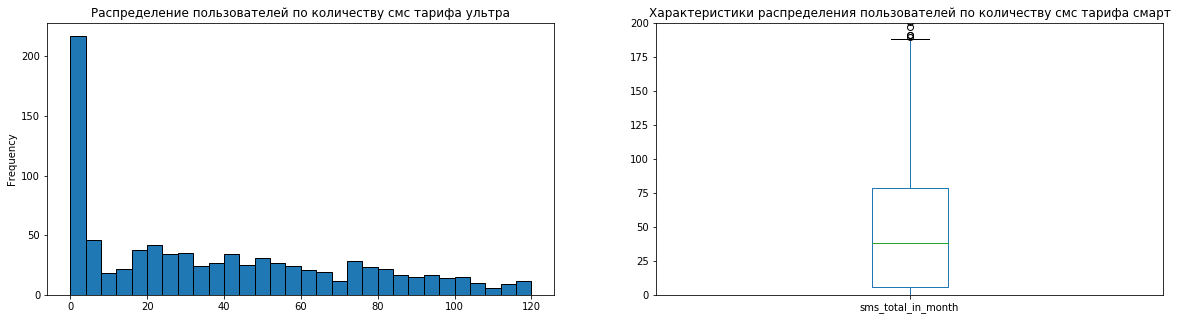

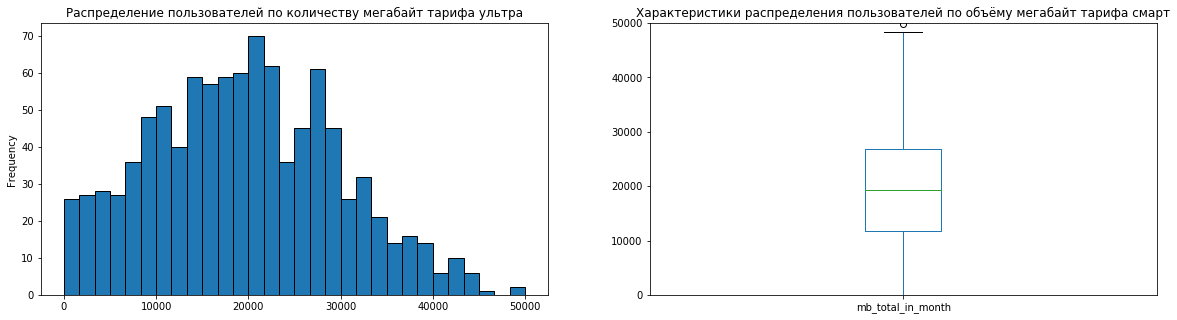

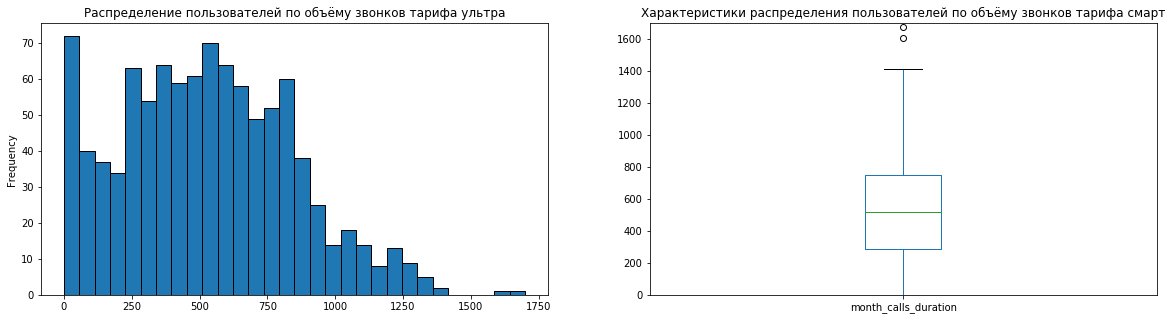

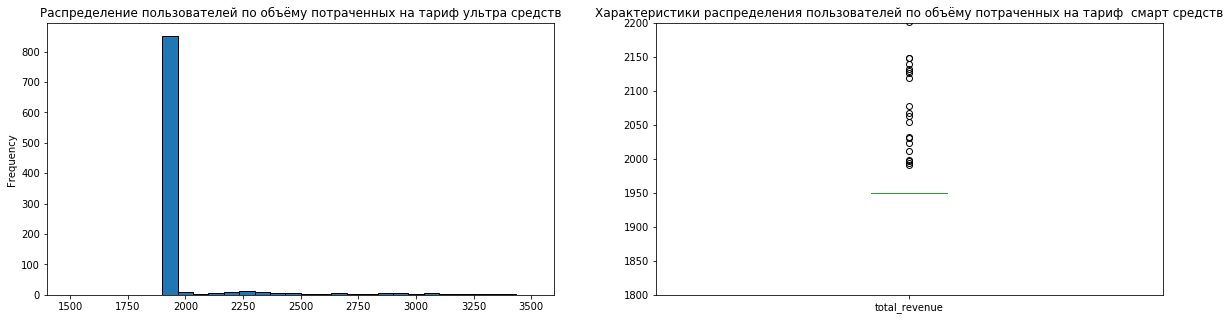

In [30]:
ultra_dict = [ 
                {'bins' : 30 , 'column': 'sms_total_in_month', 'title_hist': 'Распределение пользователей по количеству смс тарифа ультра',
                'title_boxplot': 'Характеристики распределения пользователей по количеству смс тарифа смарт', 'range': 120, 'range_min' : 0,
                'box_lim' : 200, 'box_min' : 0},
 
                {'bins' : 30 , 'column': 'mb_total_in_month', 'title_hist': 'Распределение пользователей по количеству мегабайт тарифа ультра',
                'title_boxplot': 'Характеристики распределения пользователей по объёму мегабайт тарифа смарт', 'range': 50000, 'range_min'  : 0,
                 'box_lim' : 50000, 'box_min' : 0}, 
 
                {'bins' : 30 , 'column': 'month_calls_duration', 'title_hist': 'Распределение пользователей по объёму звонков тарифа ультра',
                'title_boxplot': 'Характеристики распределения пользователей по объёму звонков тарифа смарт', 
                 'range': 1700, 'range_min' : 0, 'box_lim' : 1700, 'box_min' : 0},
    
                {'bins' : 30 , 'column': 'total_revenue', 'title_hist': 'Распределение пользователей по объёму потраченных на тариф ультра средств',
                'title_boxplot': 'Характеристики распределения пользователей по объёму потраченных на тариф  смарт средств', 'range' : 3500 , 'range_min' : 1500,
                 'box_lim' : 2200, 'box_min' : 1800}
]
for row in ultra_dict:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    ax1 = ultra_df[row['column']].plot(kind='hist', title=row['title_hist'], bins=row['bins'], 
                                 range=(row['range_min'], row['range']), ax=ax1, ec='black')
    ax2 = ultra_df[row['column']].plot(kind='box', title=row['title_boxplot'], ax=ax2, ylim=(row['box_min'], row['box_lim']))

СМС : медиана  - 38 смс в месяц. Основное количество значений находится в диапазоне 6 - 79. Больше 190 можем считать выбросами
Объём трафика: медиана - 19324 мб в месяц. Основное количество значений в диапазоне 11500 - 27000. Больше 48000 - выбросы
Количество потраченных на звонки минут: медиана - 518, основное количество значений в диапазоне - 280 - 750. Больше 1400 можем считать выбросами. 
Количество потраченных на тариф средств: большинство пользователей укладывается в стоимость тарифа с его условиями - 1950 рублей, в связи с чем не пользуются дополнительными услугами.

In [31]:
# Рассчитаем медиану, среднее, дисперсию и и стандартное отклонение для разных тарифов по использованным смс соответственно
df.groupby('tariff').agg({'sms_total_in_month':['median','mean','var','std']})

sms_total_in_month                                   
                   median       mean          var        std
tariff                                                      
smart                28.0  33.384029   796.812958  28.227876
ultra                38.0  49.363452  2285.266143  47.804457

In [32]:
# Рассчитаем медиану, среднее, дисперсию и и стандартное отклонение для разных тарифов по использованному трафику соответственно
df.groupby('tariff').agg({'mb_total_in_month':['median','mean','var','std']})

mb_total_in_month                                          
                  median          mean           var           std
tariff                                                            
smart            16531.0  16229.188425  3.454591e+07   5877.576978
ultra            19324.0  19486.901523  1.019356e+08  10096.317202

In [33]:
# Рассчитаем медиану, среднее, дисперсию и и стандартное отклонение для разных тарифов по совершённым звонкам соответственно
df.groupby('tariff').agg({'calls_total_in_month':['median','mean','var','std']})

calls_total_in_month                                   
                     median       mean          var        std
tariff                                                        
smart                  60.0  58.463437   672.876243  25.939858
ultra                  74.0  73.392893  1928.689990  43.916853

In [34]:
# Рассчитаем медиану, среднее, дисперсию и и стандартное отклонение для разных тарифов по выручке соответственно
df.groupby('tariff').agg({'total_revenue':['median','mean','var','std']})

total_revenue                                        
              median         mean            var         std
tariff                                                      
smart            959  1233.057873  620225.603023  787.544032
ultra           1950  2060.462944  126869.448067  356.187378

In [35]:
# Посмотрим на количество пользователей по каждому тарифу
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

## Вывод

Пользователи тарифа смарт в большинстве своём не укладываются в предложенные условия тарифа и тратят дополнительно к 550 рублям стоимости тарифа дополнительно 400 - 1110 рублей. Не хватает им, в основном, именно интернет трафика, а по всем остальным показателям они укладываются в условия тарифа. Самое распространённое значение превышения по трафику - 5 гб выше базового значения тарифа. 
Пользователи же тарифа ультра не используют дополнительные пакеты услуг, так как им хватает базовых пакетов. 
Но стоит заметить, что на тарифе ультра все показатели немного выше: 
1. смс: 6 - 79 в месяц против 10 - 51 в месяц 
2. минуты разговора: 280 - 750 против 282 - 545
3. трафик: 11.5 - 27 гб против 12 - 20 гб
4. количество пользователей по тарифу смарт - 351, по тарифу ультра - 149 - единственный показатель, по которому результат противоположный


Не вызвано ли это ошибкой проверим в следующем пункте.

# Проверить гипотезы

Необходимо проверить следующие гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

*Гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается*
Нулевая гипотеза будет звучать так: средние значения двух выборок равны, то есть значимых различий между тарифами "Ультра" и "Смарт" нет.

In [36]:
# Проверим дисперсии выборок, чтобы определиться, какой критерий в дальнейшем использовать
variance_estimate_smart = np.var(smart_df['total_revenue'], ddof=1)
print(variance_estimate_smart)
variance_estimate_ultra = np.var(ultra_df['total_revenue'], ddof=1)
print(variance_estimate_ultra)

620225.6030225853
126869.44806652633


Дисперсии получились разные, поэтому в ттесте будем использовать параметр equal_var=False

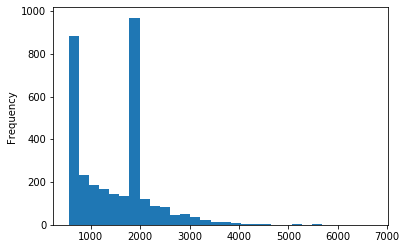

In [37]:
df['total_revenue'].plot(kind='hist', bins=30)

In [38]:
# Проверим
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(smart_df['total_revenue'], ultra_df['total_revenue'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.133013116078655e-296
Отвергаем нулевую гипотезу


Таким образом, гипотезу  о различии выручки в тарифах "Смарт" и "Ультра" не отвергаем, та как уровень значимости значительно меньше 0.05.

*Гипотеза 2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов*
Нулевая гипотеза будет звучать как: средние значения двух выборок будут равны, то есть выручка пользователей из Москвы и пользователей из других регионов не имеет различий.

In [39]:
df

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,rub_per_gb,rub_per_message,rub_per_minute,mb_over_limit,sms_over_limit,calls_over_limit,mb_over_fee,sms_over_fee,calls_over_fee,total_revenue
0,1000,5,159.0,22.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,...,150,1,1,0.0,0.0,0.0,0,0,0,1950
1,1000,6,172.0,43.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,...,150,1,1,0.0,0.0,0.0,0,0,0,1950
2,1000,7,340.0,47.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,...,150,1,1,0.0,0.0,0.0,0,0,0,1950
3,1000,8,408.0,52.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,...,150,1,1,0.0,0.0,0.0,0,0,0,1950
4,1000,9,466.0,58.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,...,150,1,1,0.0,0.0,0.0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17232.0,35,NaN,Санкт-Петербург,Павел,...,200,3,3,1872.0,0.0,0.0,365,0,0,915
3210,1489,10,0.0,0.0,21.0,19588.0,35,NaN,Санкт-Петербург,Павел,...,200,3,3,4228.0,0.0,0.0,825,0,0,1375
3211,1489,11,0.0,0.0,20.0,17516.0,35,NaN,Санкт-Петербург,Павел,...,200,3,3,2156.0,0.0,0.0,421,0,0,971
3212,1489,12,0.0,0.0,35.0,17341.0,35,NaN,Санкт-Петербург,Павел,...,200,3,3,1981.0,0.0,0.0,386,0,0,936


In [40]:
# Посмотрим на дисперсии выборок, чтобы понять, каким критерием пользоваться
variance_estimate_moscow = np.var(df[df['city']=='Москва']['total_revenue'], ddof=1)
print(variance_estimate_moscow)
variance_estimate_notmoscow = np.var(df[df['city']!='Москва']['total_revenue'], ddof=1)
print(variance_estimate_notmoscow)


547132.6987684795
630400.9683263235


Дисперсии получились разные

In [41]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df[df['city']=='Москва']['total_revenue'], df[df['city']!='Москва']['total_revenue'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4546446281204245
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось. Делаем вывод, что статистических различий между выручкой от пользователей, живущих в Москве, и пользователей, не живущих в Москве, - нет.

# Общий вывод:

В данной работе мы сравнили два тарифных плана "Смарт" и "Ультра". Статистический анализ показал, что гипотеза "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" не может быть отвергнута - уровень значимости <0,01, гипотезу же "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" не смогли подтвердить, так как статистическая значимость 0,47 гласит о том, что нельзя отвергнуть нулевую гипотезу о равенстве средних.

Так же был проведён исследовательский анализ данных. Мы получили такие результаты: пользователи тарифа "ультра", по большей части, укладываются в базовые пакеты и не переплачивают за дополнительные услуги и платят 1950 рублей, а пользователи тарифа "смарт" доплачивают в среднем 400 - 1110 рублей свыше 550 базовых, в общем получается промежуток 550-1660 рублей, медиана - 950 рублей. Основной переплатой является интернет-трафик, который доходит до 5 гб свыше 15 гб базовых. 

Но может быть полезным сказать, что пользователи тарифа ультра чуть больше используют все услуги:
1. смс: 6 - 79 в месяц против 10 - 51 в месяц 
2. минуты разговора: 280 - 750 против 282 - 545
3. трафик: 11.5 - 27 гб против 12 - 20 гб
И наконец, стоит упомянуть, что были изменены типы некоторых стоблцов, были объединены разрозненные таблицы в одну и заполнены пропуски. 

#### *Можем сказать, что тариф "ультра" приносит больше прибыли, так как подтвердилась гипотеза о различии средних двух выборок планов "смарт" и "ультра" и  согласно исследовательскому анализу средняя потраченная сумма тарифа "ультра" - 1950 рублей, а тарифа "смарт 550-1660 рублей с наибольшей представленностью суммы в 950 рублей. Стоит учесть, что тарифом "смарт" пользуется большее число пользователей, но доплаты сверх тарифа могут быть фактором риска, который может привести к потере клиентов от недовольства. Поэтому я считаю, что тариф "ультра" более перспективен, чем "смарт" в том виде, в котором тарифы представлены*